## Musk Twitter


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpreda/elon-musk-tweets")

print("Path to dataset files:", path)

Path to dataset files: /Users/Ray/.cache/kagglehub/datasets/gpreda/elon-musk-tweets/versions/336


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf  # Fetch Tesla stock data
import tweepy  # Fetch tweets (if using Twitter API)
from textblob import TextBlob  # Sentiment Analysis
from scipy.stats import pearsonr, spearmanr, ttest_ind  # Correlation tests
from statsmodels.tsa.stattools import grangercausalitytests  # Granger causality test

In [3]:
FILE_PATH = "/Users/Ray/Documents/GS_work/ElonTwitter/elon_musk_tweets.csv"

tweets = pd.read_csv(FILE_PATH)
tweets.head(20)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False
5,1544374564255309826,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:36:03+00:00,I must confess to a penchant for creative socks,NaN,Twitter for iPhone,4839,97004,False
6,1544330849927270408,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 14:42:21+00:00,@slashdot It’s time,NaN,Twitter for iPhone,1537,31194,False
7,1544320280247549954,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 14:00:21+00:00,@TonyadeVitti @historydefined His success was ...,NaN,Twitter for iPhone,171,3196,False
8,1544316752657629189,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 13:46:20+00:00,@historydefined While bleak posts maybe genera...,NaN,Twitter for iPhone,2347,47623,False
9,1544743525585141761,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101308933,115,13514,True,2022-07-06 18:02:11+00:00,@mishaboar @boringcompany Supporting Doge wher...,NaN,Twitter for iPhone,2081,10679,False


In [5]:
print(len(tweets))
print(tweets['date'].min(), tweets['date'].max())

5904
2022-07-05 13:46:20+00:00 2023-06-13 01:49:01+00:00


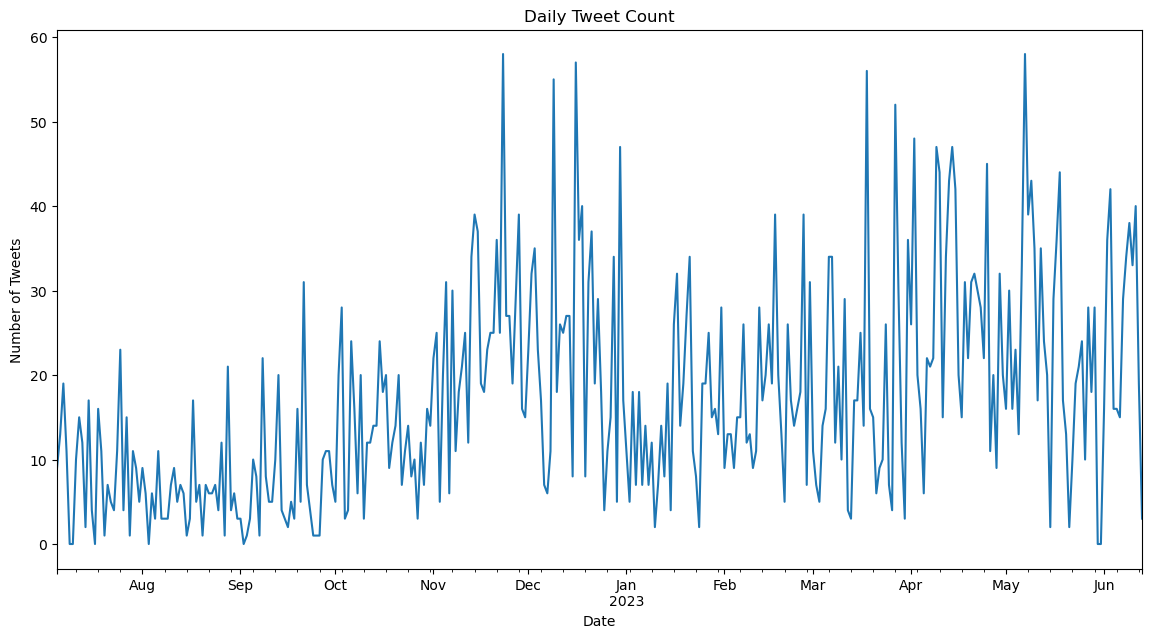

In [8]:
# plot tweets count over every 1-day period
tweets['date'] = pd.to_datetime(tweets['date'])
tweets.set_index('date', inplace=True)
tweets['count'] = 1
tweets_daily = tweets.resample('D').count()['count']
plt.figure(figsize=(14, 7))
tweets_daily.plot(title='Daily Tweet Count', xlabel='Date', ylabel='Number of Tweets')
plt.show()

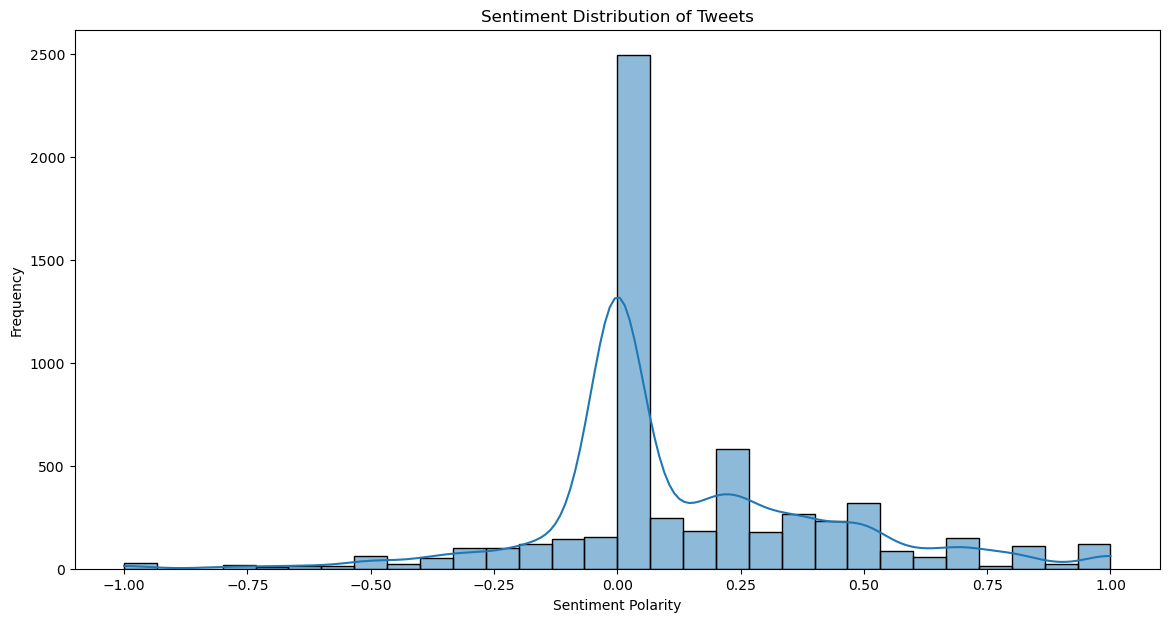

In [16]:

# Sentiment analysis
def get_sentiment(text):
    """Calculate sentiment polarity using TextBlob."""
    return TextBlob(text).sentiment.polarity    

tweets['sentiment'] = tweets['text'].apply(get_sentiment)
plt.figure(figsize=(14, 7))
sns.histplot(tweets['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [23]:
tweets['sentiment'].describe()

count    5904.000000
mean        0.137044
std         0.302313
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.300000
max         1.000000
Name: sentiment, dtype: float64

In [24]:
# Print the most n positive and negative tweets
def print_top_n_tweets(tweets, n=5):
    """Print the top n most positive and negative tweets."""
    most_positive = tweets.nlargest(n, 'sentiment')
    most_negative = tweets.nsmallest(n, 'sentiment')
    
    print("Most Positive Tweets:")
    for i, row in most_positive.iterrows():
        print(f"{row['date']}: {row['text']} (Sentiment: {row['sentiment']})")
    
    print("\nMost Negative Tweets:")
    for i, row in most_negative.iterrows():
        print(f"{row['date']}: {row['text']} (Sentiment: {row['sentiment']})")
print_top_n_tweets(tweets.reset_index(), n=5)

Most Positive Tweets:
2022-07-08 00:48:09+00:00: @slashdot Great! (Sentiment: 1.0)
2022-07-07 22:26:06+00:00: @BillyM2k China &amp; Japan have awesome trains. 

Took bullet train from Beijing to Xi’an to see Terracotta Army of 秦始皇. (Sentiment: 1.0)
2022-07-19 17:34:20+00:00: One of the best features of Model X https://t.co/zUTcSD7fiz (Sentiment: 1.0)
2022-07-21 23:48:35+00:00: @jgebbia @Airbnb @bchesky @nathanblec Congrats on an incredible company with Airbnb, now for Book 2! (Sentiment: 1.0)
2022-08-25 19:33:21+00:00: @SawyerMerritt @SpaceX Ron Barron is awesome (Sentiment: 1.0)

Most Negative Tweets:
2022-07-08 14:47:39+00:00: @hiromichimizuno Terrible news (Sentiment: -1.0)
2022-09-21 02:41:37+00:00: @teslaownersSV @RBReich Reich is suicidally boring (Sentiment: -1.0)
2022-11-07 15:22:16+00:00: To independent-minded voters:

Shared power curbs the worst excesses of both parties, therefore I recommend voting… https://t.co/eoF1ahHtxj (Sentiment: -1.0)
2022-12-02 19:17:52+00:00: There 

In [25]:

from collections import Counter
def get_most_frequent_words(tweets, sentiment, top_n=10):
    words = ' '.join(tweets[tweets['sentiment'] == sentiment]['text']).split()
    most_common = Counter(words).most_common(top_n)
    return most_common
positive_words = get_most_frequent_words(tweets, 'positive')
negative_words = get_most_frequent_words(tweets, 'negative')
print("Most Frequent Positive Words:", positive_words)
print("Most Frequent Negative Words:", negative_words)

Most Frequent Positive Words: []
Most Frequent Negative Words: []


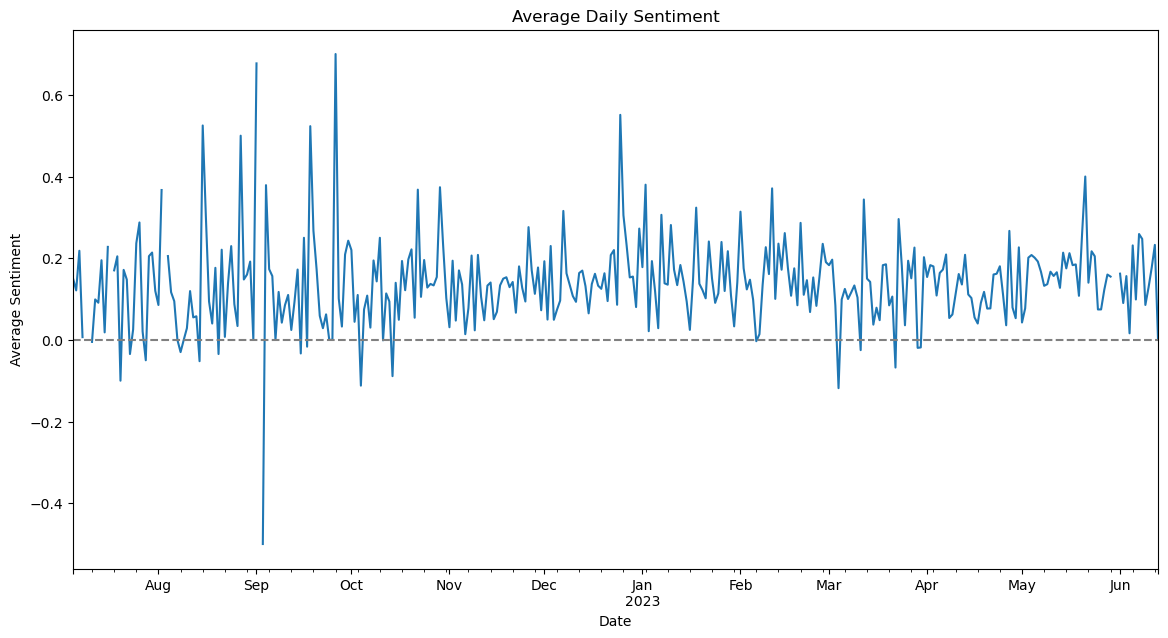

In [29]:
# Average daily sentiment
# Ensure 'sentiment' is float and index is datetime
if tweets['sentiment'].dtype != float:
    tweets['sentiment'] = pd.to_numeric(tweets['sentiment'], errors='coerce')
    
# if not pd.api.types.is_datetime64_any_dtype(tweets.index):
#     tweets['date'] = pd.to_datetime(tweets['date'])
#     tweets.set_index('date', inplace=True)
sentiment_daily = tweets['sentiment'].resample('D').mean()
plt.figure(figsize=(14, 7))
sentiment_daily.plot(title='Average Daily Sentiment', xlabel='Date', ylabel='Average Sentiment')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

In [46]:

# plot frequency of tweets by hour
tweets['hour'] = tweets.index.hour
plt.figure(figsize=(14, 7))
sns.countplot(x='hour', data=tweets.reset_index(), palette='viridis')
plt.title('Tweet Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.xticks(range(0, 24))
plt.show()
# Fetch Tesla stock data

ValueError: cannot insert date, already exists

<Figure size 1400x700 with 0 Axes>

Failed to get ticker 'GOOGL' reason: Expecting value: line 1 column 1 (char 0)
GOOGL: No price data found, symbol may be delisted (period=1d)


Intraday Data for GOOGL (Interval: 1h)
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
